In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from root_numpy import root2array, tree2array
from root_numpy import testdata
import ROOT
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from matplotlib.colors import LogNorm
import h5py

In [3]:
def az_ze_sun(file):
    suninMonth = open(file)
    az, ze  = np.array([]),np.array([])
    for ln in suninMonth:
        if ln[0]=='#':
            continue
        row = ln.split(', ')
        az = np.append(az,float(row[0]))
        ze = np.append(ze,float(row[1][:-1]))
    return az, ze
    
az_01,ze_01 = az_ze_sun('Months/enero07.dat')
az_04,ze_04 = az_ze_sun('Months/abril07.dat')
az_07,ze_07 = az_ze_sun('Months/julio07.dat')
az_10,ze_10 = az_ze_sun('Months/noviembre07.dat')

a = az_01[np.argsort(az_01)]-2*(az_01[np.argsort(az_01)]-180)
b = ze_01[np.argsort(az_01)]-2*(ze_01[np.argsort(az_01)]-90)
x, y = a-360, b
x, y = np.append(x,a), np.append(y,b)
x, y = np.append(x,a+360), np.append(y,b)
ftop = interp1d(x,y)

a = az_07[np.argsort(az_07)]-2*(az_07[np.argsort(az_07)]-180)
b = ze_07[np.argsort(az_07)]-2*(ze_07[np.argsort(az_07)]-90)
x, y = a-360, b
x, y = np.append(x,a), np.append(y,b)
x, y = np.append(x,a+360), np.append(y,b)


fbotom = interp1d(x,y)

In [4]:
anumu = ROOT.TFile('../../Ntuples/anumu_dm_2000GeV.root')
numu = ROOT.TFile('../../Ntuples/numu_dm_2000GeV.root')
atmu = ROOT.TFile('../../Ntuples/mupage_sun.root')

# load Ntuples
anu = anumu.Get('antree')
nu = numu.Get('antree')
mu = atmu.Get('antree')
# and convert the TTree into an array
anu_arr = tree2array(anu)
nu_arr= tree2array(nu)
mu_arr= tree2array(mu)


In [5]:
#dates
ymd_min, ymd_max = 20072020, 20122020 
#direction 
cos_min, cos_max = 0., 1.
#quality
beta_max = 1.
# runs
run_min, run_max = 25800,68170
# lambda 
lam_min, lam_max = -5.3, 0.

# define weights
w_bg_anu  = anu_arr["mc_rbr"]*anu_arr["mc_wc"]*(anu_arr["mc_wH"]+anu_arr["mc_wS"])
w_bg_nu   =  nu_arr["mc_rbr"]* nu_arr["mc_wc"] *(nu_arr["mc_wH"]+ nu_arr["mc_wS"])
# define cuts
mu_cuts   = (np.cos(mu_arr["a_th"])>cos_min)&(mu_arr["a_beta"]<beta_max)&(mu_arr["run"]>run_min)&\
                (mu_arr["ymd"]>ymd_min)&(mu_arr["ymd"]<ymd_max)&(mu_arr["a_beta"]<beta_max)#(mu_arr["a_lambda"]>lam_min)&\
                   
    
nu_cuts   = (nu_arr["ymd"]>ymd_min)&(nu_arr["ymd"]<ymd_max)&\
             (np.cos(nu_arr["a_th"])>cos_min)&(np.cos(nu_arr["a_th"])<cos_max)&\
               (nu_arr["a_beta"]<beta_max)#&(nu_arr["a_lambda"]>lam_min)
    
    
anu_cuts   = (anu_arr["ymd"]>ymd_min)&(anu_arr["ymd"]<ymd_max)&\
              (np.cos(anu_arr["a_th"])>cos_min)&(np.cos(anu_arr["a_th"])<cos_max)&\
                (anu_arr["a_beta"]<beta_max)#&(anu_arr["a_lambda"]>lam_min)
    

In [6]:
f = open("../../dat-wimp-clean/all_wimps_bb.dat")
dm_mass = dN = E = nut = np.array([])
for l in f:
    row = l.split(" ")
    if row[0]=="#":continue
    if len(row)<4:continue
    dm_mass = np.append(dm_mass,row[0])
    dN = np.append(dN,row[1])
    E = np.append(E,row[2])
    nut = np.append(nut,row[3][:-1])
print "done"

done


In [7]:
bb=np.loadtxt("../../dat-wimp-clean/all_wimps_bb.dat")
dm_mass,dN,E,nut=bb[:,0],bb[:,1],bb[:,2],bb[:,3]

mydm,mye,myt= 2000,100,3.

def dm_weight_bb(mydm,mye,myt):
    target=(dm_mass==mydm)&(nut==myt)
    return dN[target][np.argmin(np.abs(E[target]-mye))]

mc2dn_bb = np.vectorize(dm_weight_bb)

In [8]:
tt=np.loadtxt("../../dat-wimp-clean/all_wimps_tautau.dat")
dm_mass,dN,E,nut=tt[:,0],tt[:,1],tt[:,2],tt[:,3]

mydm,mye,myt= 2000,100,3.

def dm_weight_tt(mydm,mye,myt):
    target=(dm_mass==mydm)&(nut==myt)
    return dN[target][np.argmin(np.abs(E[target]-mye))]

mc2dn_tt = np.vectorize(dm_weight_tt)

In [9]:
WW=np.loadtxt("../../dat-wimp-clean/all_wimps_WW.dat")
dm_mass,dN,E,nut=WW[:,0],WW[:,1],WW[:,2],WW[:,3]

mydm,mye,myt= 2000,100,3.

def dm_weight_WW(mydm,mye,myt):
    target=(dm_mass==mydm)&(nut==myt)
    return dN[target][np.argmin(np.abs(E[target]-mye))]

mc2dn_WW = np.vectorize(dm_weight_WW)

In [ ]:
i=2000
tttt=np.loadtxt("../../dat-wimp-clean/all_wimps_tautau.dat")
dm_mass_arr= np.unique(tttt[:,0])
for i in dm_mass_arr: 
    print "trying with m_chi = ",i," GeV"
    if i==2000.:
        continue
    if i<100:
        continue
    """
    try:
        print "WW"
        dm_mass,dN,E,nut=WW[:,0],WW[:,1],WW[:,2],WW[:,3]
        nu_dm_WW = mc2dn_WW(i,nu_arr["mc_ene"],3)
        h5f = h5py.File('../../datafiles/dm2WW_nu_'+str(i)+'_GeV.h5','w')
        h5f.create_dataset('w_WW_'+str(i), data=nu_dm_WW)
        h5f.close()
        anu_dm_WW = mc2dn_WW(i,anu_arr["mc_ene"],4)
        h5f = h5py.File('../../datafiles/dm2WW_anu_'+str(i)+'_GeV.h5','w')
        h5f.create_dataset('w_WW_'+str(i), data=anu_dm_WW)
        h5f.close()
        print "dm2W+W-"
    except:
        print i,"not worked for WW"
    """
    try:
        if i==1000:
            continue
        print "tt"
        dm_mass,dN,E,nut=tt[:,0],tt[:,1],tt[:,2],tt[:,3]
        nu_dm_tt = mc2dn_tt(i,nu_arr["mc_ene"],3)
        os.system('rm ../../datafiles/dm2tt_nu_'+str(i)+'_GeV.h5')
        h5f = h5py.File('../../datafiles/dm2tt_nu_'+str(i)+'_GeV.h5','w')
        h5f.create_dataset('w_tt_'+str(i), data=nu_dm_tt)
        h5f.close()
        anu_dm_tt = mc2dn_tt(i,anu_arr["mc_ene"],4)
        h5f = h5py.File('../../datafiles/dm2tt_anu_'+str(i)+'_GeV.h5','w')
        h5f.create_dataset('w_tt_'+str(i), data=anu_dm_tt)
        h5f.close()
        print "dm2tautau"
    except:
        print i,"not worked for tt"
    
    try:
        if i==1000:
            continue
        print "bb"
        dm_mass,dN,E,nut=bb[:,0],bb[:,1],bb[:,2],bb[:,3]
        nu_dm_bb = mc2dn_bb(i,nu_arr["mc_ene"],3)
        h5f = h5py.File('../../datafiles/dm2bb_nu_'+str(i)+'_GeV.h5','w')
        h5f.create_dataset('w_bb_'+str(i), data=nu_dm_bb)
        h5f.close()
        anu_dm_bb = mc2dn_bb(i,anu_arr["mc_ene"],4)
        h5f = h5py.File('../../datafiles/dm2bb_anu_'+str(i)+'_GeV.h5','w')
        h5f.create_dataset('w_bb_'+str(i), data=anu_dm_bb)
        h5f.close()
        print "dm2bbar"
    except:
        print i,"not worked for bb"
        

trying with m_chi =  10.0  GeV
trying with m_chi =  25.0  GeV
trying with m_chi =  50.0  GeV
trying with m_chi =  80.0  GeV
trying with m_chi =  91.0  GeV
trying with m_chi =  100.0  GeV
tt


In [1]:
xedges = np.linspace(0,360,360)
yedges = np.linspace(0,90,90)
rad2deg= (360./(2.*np.pi))
condition = (nu_arr["mc_th"]*rad2deg>ftop(nu_arr["mc_ph"]*rad2deg))&((nu_arr["mc_th"]*rad2deg<fbotom(nu_arr["mc_ph"]*rad2deg)))

H, xedges, yedges = np.histogram2d(rad2deg*(nu_arr["a_ph"])[condition], 
                                   rad2deg*(nu_arr["a_th"])[condition],
                                   bins=(xedges, yedges),
                                   weights=w_sg_nu_tt[condition])
nu = H.T


condition = (anu_arr["mc_th"]*rad2deg>ftop(anu_arr["mc_ph"]*rad2deg))&((anu_arr["mc_th"]*rad2deg<fbotom(anu_arr["mc_ph"]*rad2deg)))
H, xedges, yedges = np.histogram2d(rad2deg*(anu_arr["a_ph"])[condition], 
                                   rad2deg*(anu_arr["a_th"])[condition],
                                   bins=(xedges, yedges),
                                   weights=w_sg_anu_tt[condition])
anu = H.T

NameError: name 'np' is not defined

In [140]:
phi_arr = np.linspace(0,360,720)
fig, ax = plt.subplots()
ax.plot(phi_arr, ftop(phi_arr),color="#2d318c",lw=2)
ax.plot(phi_arr, fbotom(phi_arr),color="#5d62d5",lw=2)

allofthem = ax.imshow(nu+anu,interpolation='nearest', origin='low',cmap="magma",
                       extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',
                       norm=LogNorm(vmin=1e1,vmax=3e6)
                     )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


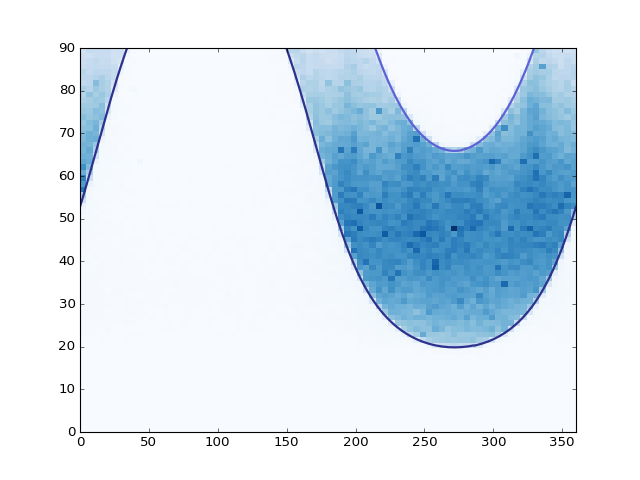

In [122]:
phi_arr = np.linspace(0,360,720)
fig, ax = plt.subplots()
ax.plot(phi_arr, ftop(phi_arr),color="#2d318c",lw=2)
ax.plot(phi_arr, fbotom(phi_arr),color="#5d62d5",lw=2)

allofthem = ax.imshow(nu+anu,interpolation='nearest', origin='low',cmap="Blues",
                       extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],aspect='auto',)

In [27]:
tttt=np.loadtxt("../../dat-wimp-clean/all_wimps_tautau.dat")
np.unique(tttt[:,0])
wwww=np.loadtxt("../../dat-wimp-clean/all_wimps_WW.dat")
bbbb=np.loadtxt("../../dat-wimp-clean/all_wimps_bb.dat")

In [28]:
print np.unique(tttt[:,0])

[  10.   25.   50.   80.   91.  100.  150.  176.  200.  250.  350.  500.
  750. 1000. 1500. 2000. 3000. 5000. 7500.]


In [29]:
print np.unique(wwww[:,0])

[  80.   91.  100.  150.  176.  200.  250.  350.  500.  750. 1000. 1500.
 2000. 3000. 5000. 7500.]


In [30]:
print np.unique(bbbb[:,0])

[  10.   25.   50.   80.   91.  100.  150.  176.  200.  250.  350.  500.
  750. 1000. 1500. 2000. 3000. 5000. 7500.]


In [8]:
nu_dm_bb = mc2dn_bb(2000,nu_arr["mc_ene"],3)

In [9]:
h5f = h5py.File('../../datafiles/dm2bb_nu_2000_GeV.h5','w')
h5f.create_dataset('w_bb_2000', data=nu_dm_bb)
h5f.close()

In [10]:
anu_dm_bb = mc2dn_bb(2000,anu_arr["mc_ene"],4)

In [7]:
h5f = h5py.File('../../datafiles/dm2bb_anu_2000_GeV.h5','w')
h5f.create_dataset('w_bb_2000', data=anu_dm_bb)
h5f.close()

NameError: name 'anu_dm_bb' is not defined

In [12]:
w_sg_nu_bb = nu_arr["mc_rbr"]*nu_arr["mc_wc"]*nu_arr["mc_w2"]*nu_dm_bb
w_sg_anu_bb = anu_arr["mc_rbr"]*anu_arr["mc_wc"]*anu_arr["mc_w2"]*anu_dm_bb

In [14]:
nu_dm_tt = mc2dn_tt(2000,nu_arr["mc_ene"],3)

In [15]:
h5f = h5py.File('../../datafiles/dm2tt_nu_2000_GeV.h5','w')
h5f.create_dataset('w_tt_2000', data=nu_dm_tt)
h5f.close()

In [16]:
anu_dm_tt = mc2dn_tt(2000,anu_arr["mc_ene"],4)

In [17]:
h5f = h5py.File('../../datafiles/dm2tt_anu_2000_GeV.h5','w')
h5f.create_dataset('w_tt_2000', data=anu_dm_tt)
h5f.close()

In [118]:
w_sg_nu_tt = nu_arr["mc_rbr"]*nu_arr["mc_wc"]*nu_arr["mc_w2"]*nu_dm_tt
w_sg_anu_tt = anu_arr["mc_rbr"]*anu_arr["mc_wc"]*anu_arr["mc_w2"]*anu_dm_tt

In [23]:
nu_dm_WW = mc2dn_WW(2000,nu_arr["mc_ene"],3)

In [24]:
h5f = h5py.File('../../datafiles/dm2WW_nu_2000_GeV.h5','w')
h5f.create_dataset('w_WW_2000', data=nu_dm_WW)
h5f.close()

In [25]:
anu_dm_WW = mc2dn_WW(2000,anu_arr["mc_ene"],4)

In [26]:
h5f = h5py.File('../../datafiles/dm2WW_anu_2000_GeV.h5','w')
h5f.create_dataset('w_WW_2000', data=anu_dm_WW)
h5f.close()